In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%matplotlib inline 

In [21]:
dark = ["#8c510a", "#01665e", "#762a83"]
med = ["#d8b365", "#5ab4ac", "#af8dc3"]

In [70]:
def color_variant(hex_color, brightness_offset=1):
    """ takes a color like #87c95f and produces a lighter or darker variant """
    if len(hex_color) != 7:
        raise Exception("Passed %s into color_variant(), needs to be in #87c95f format." % hex_color)
    rgb_hex = [hex_color[x:x+2] for x in [1, 3, 5]]
    new_rgb_int = [int(hex_value, 16) + brightness_offset for hex_value in rgb_hex]
    new_rgb_int = [min([255, max([0, i])]) for i in new_rgb_int] # make sure new values are between 0 and 255
    # hex() produces "0x88", we want just "88"
    return "#" + "".join([hex(i)[2:] for i in new_rgb_int])

In [76]:
color_variant("#d8b365", 120)

'#ffffdd'

In [152]:
brwn = "#8c510a"
purp = "#762a83"
teal = "#01665e"
brwns = [color_variant(brwn, (i+2)*10) for i in range(0, 9)]
purps = [color_variant(purp, (i+1)*50) for i in range(0, 3)]
teals = [color_variant(teal, (i+2)*10) for i in range(0, 13)]

In [32]:
pklfile = '../learn/pkl_trainsets/28jun2019/_nucs_fiss_not-scaled.pkl'
trainXY = pd.read_pickle(pklfile)
trainXY.reset_index(inplace=True, drop=True)

In [101]:
def splitXY(dfXY):
    lbls = ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor']
    dfX = dfXY.drop(lbls, axis=1)
    if 'total' in dfX.columns:
        dfX.drop('total', axis=1, inplace=True)
    r_dfY = dfXY.loc[:, lbls[0]]
    c_dfY = dfXY.loc[:, lbls[1]]
    e_dfY = dfXY.loc[:, lbls[2]]
    b_dfY = dfXY.loc[:, lbls[3]]
    o_dfY = dfXY.loc[:, lbls[4]]
    return dfX, r_dfY, c_dfY, e_dfY, b_dfY, o_dfY

X, rY, cY, eY, bY, oY = splitXY(trainXY)
yo = trainXY.OrigenReactor
yr = trainXY.ReactorType

In [155]:
lda = LinearDiscriminantAnalysis(n_components=3)
fit = lda.fit(X, yo).transform(X)

In [111]:
target_names = yo.unique()
target_names

array(['ce14x14', 'ce16x16', 'w14x14', 'w15x15', 'w17x17', 's14x14',
       's18x18', 'bw15x15', 'vver1000', 'ge7x7-0', 'ge8x8-1', 'ge9x9-2',
       'ge10x10-8', 'abb8x8-1', 'atrium9x9-9', 'atrium10x10-9',
       'svea64-1', 'svea100-0', 'vver440', 'vver440_3.82', 'vver440_4.25',
       'vver440_4.38', 'candu19', 'candu28', 'candu37'], dtype=object)

In [171]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [153]:
colors = teals[0:9] + brwns + teals[9:13] + purps

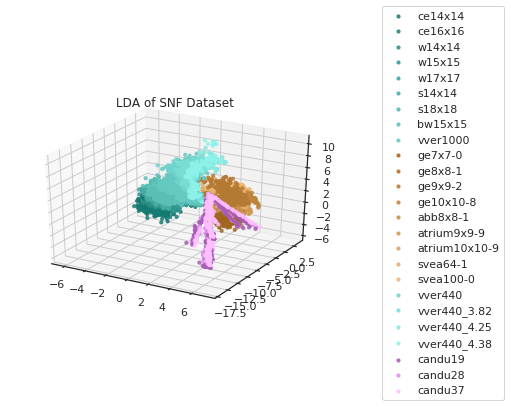

In [174]:
#target_names = ['pwr', 'bwr', 'phwr']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for color, target_name in zip(colors, target_names):
    ax.scatter(fit[yo == target_name, 0], fit[yo == target_name, 1], fit[yo == target_name, 2], 
                s=10, alpha=.8, color=color, label=target_name)
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.5), shadow=False)
plt.title('LDA of SNF Dataset')
plt.show()

In [57]:
fit_df = pd.DataFrame(fit, columns=['x1', 'x2'])
df = pd.concat([fit_df, y], axis=1)

In [58]:
df.head()

,x1,x2,ReactorType
0,-0.607444,-0.964218,pwr
1,0.663074,-0.297172,pwr
2,0.408443,-0.311231,pwr
3,0.300993,-0.348220,pwr
4,0.625885,-0.299603,pwr


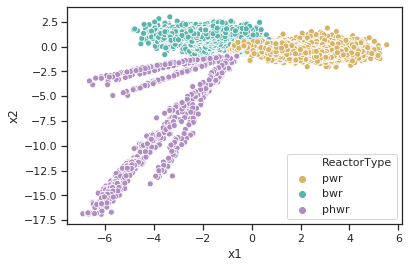

In [56]:
ax = sns.scatterplot(x='x1', y='x2', hue="ReactorType", palette=med, data=df)